<a href="https://colab.research.google.com/github/ajeetranaut/Assignment/blob/master/Pet_Classification_Model_Using_CNN_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Begin by creating the ipynb file in the same parent folder where the downloaded data set is kept. The CNN model should have the following layers:

 ● Input layer ● Convolutional layer 1 with 32 filters of kernel size[5,5]

 ● Pooling layer 1 with pool size[2,2] and stride 2 

 ● Convolutional layer 2 with 64 filters of kernel size[5,5] ● Pooling layer 2 with pool size[2,2] and stride 2 

● Dense layer whose output size is fixed in the hyper parameter: fc_size=32

 ● Dropout layer with dropout probability 0.4 Predict the class by doing a softmax on the output of the dropout layers.
 This should be followed by training and evaluation:

● For the training step, define the loss function and minimize it

● For the evaluation step, calculate the accuracy Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report on the final accuracy and loss on the evaluation data.


Building convolution Neural Network CNN

###Importing Libraries

In [ ]:
#import all the require labraries 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers

In [ ]:
dataflow = ImageDataGenerator(rescale = 1.0 / 255.0 )

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
test='/content/gdrive/MyDrive/data/test'
train='/content/gdrive/MyDrive/data/train'

In [ ]:
#import training data from file 

In [ ]:
train = dataflow.flow_from_directory('/content/gdrive/MyDrive/data/train', class_mode = 'categorical')

Found 40 images belonging to 2 classes.


In [ ]:
#import test data from file 

In [ ]:
test = dataflow.flow_from_directory('/content/gdrive/MyDrive/data/test', class_mode = 'categorical')

Found 20 images belonging to 2 classes.


In [ ]:
#build model according to 
#Input layer ● Convolutional layer 1 with 32 filters of kernel size[5,5] 
#Pooling layer 1 with pool size[2,2] and stride
#Convolutional layer 2 with 64 filters of kernel size[5,5]
#Pooling layer 2 with pool size[2,2] and stride 2
#Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
#Dropout layer with dropout probability 0.4 Predict the class by doing a softmax on the output of the dropout layers. This should be followed by training and evaluation: 
#test = dataflow.flow_from_directory('../input/dog-cat-classification/data/test', class_mode = 'categorical')

In [ ]:
model = models.Sequential()
model.add( layers.Conv2D( 32, (5, 5 ), activation = 'relu', padding = 'same', input_shape = (256,  256 , 3 )))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (5, 5 ), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 flatten (Flatten)           (None, 246016)            0

In [ ]:
#For the training step, define the loss function and minimize it

In [ ]:
sgd_opt = tf.keras.optimizers.SGD(lr = 0.001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#compiling model 

In [ ]:
history=model.compile( optimizer = sgd_opt, loss = 'binary_crossentropy', metrics =  ['accuracy'])

#model train for 100 epochs 

In [ ]:
history =model.fit(train, validation_data = test, epochs =100)

Epoch 1/100
2/2 [==============================] - 13s 11s/step - loss: 0.7086 - accuracy: 0.3750 - val_loss: 0.6864 - val_accuracy: 0.6000
Epoch 2/100
2/2 [==============================] - 9s 7s/step - loss: 0.7085 - accuracy: 0.5250 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 9s 3s/step - loss: 0.6957 - accuracy: 0.5000 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 9s 3s/step - loss: 0.6900 - accuracy: 0.5000 - val_loss: 0.6894 - val_accuracy: 0.6000
Epoch 5/100
2/2 [==============================] - 9s 3s/step - loss: 0.6897 - accuracy: 0.5750 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 9s 7s/step - loss: 0.6867 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 9s 7s/step - loss: 0.6870 - accuracy: 0.5500 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 8/100
2/2 [===============

In [ ]:
test_loss, test_accuracy = model.evaluate(test)

1/1 [==============================] - 1s 1s/step - loss: 0.7444 - accuracy: 0.4500


In [ ]:
test_loss

0.7444350719451904

In [ ]:
test_accuracy

0.550000011920929

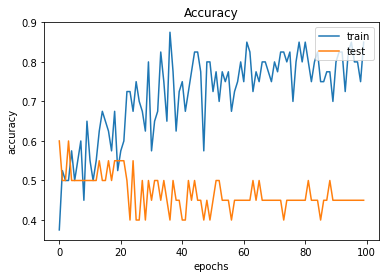

In [ ]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [ ]:
history =model.fit(train, validation_data = test, epochs =200)

Epoch 1/200
2/2 [==============================] - 8s 7s/step - loss: 0.4517 - accuracy: 0.8500 - val_loss: 0.7472 - val_accuracy: 0.4500
Epoch 2/200
2/2 [==============================] - 8s 2s/step - loss: 0.4540 - accuracy: 0.8250 - val_loss: 0.7515 - val_accuracy: 0.4500
Epoch 3/200
2/2 [==============================] - 8s 2s/step - loss: 0.4477 - accuracy: 0.8000 - val_loss: 0.7521 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 8s 2s/step - loss: 0.4350 - accuracy: 0.8750 - val_loss: 0.7499 - val_accuracy: 0.4500
Epoch 5/200
2/2 [==============================] - 9s 2s/step - loss: 0.4521 - accuracy: 0.8250 - val_loss: 0.8168 - val_accuracy: 0.4500
Epoch 6/200
2/2 [==============================] - 10s 8s/step - loss: 0.5549 - accuracy: 0.7000 - val_loss: 0.7491 - val_accuracy: 0.4500
Epoch 7/200
2/2 [==============================] - 8s 3s/step - loss: 0.4604 - accuracy: 0.8000 - val_loss: 0.7842 - val_accuracy: 0.5000
Epoch 8/200
2/2 [================

In [ ]:
test_loss, test_accuracy = model.evaluate(test)

1/1 [==============================] - 1s 1s/step - loss: 0.9691 - accuracy: 0.5500


In [ ]:
test_loss

0.969073474407196

In [ ]:
test_accuracy

0.550000011920929

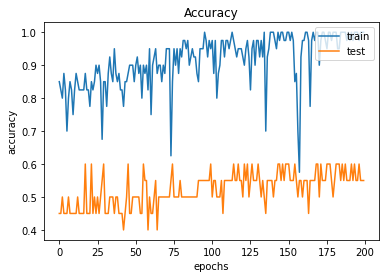

In [ ]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [ ]:
history =model.fit(train, validation_data = test, epochs =300)

Epoch 1/300
2/2 [==============================] - 8s 3s/step - loss: 0.0800 - accuracy: 1.0000 - val_loss: 0.9840 - val_accuracy: 0.5500
Epoch 2/300
2/2 [==============================] - 8s 7s/step - loss: 0.0944 - accuracy: 1.0000 - val_loss: 0.9699 - val_accuracy: 0.6000
Epoch 3/300
2/2 [==============================] - 8s 2s/step - loss: 0.0767 - accuracy: 1.0000 - val_loss: 1.0005 - val_accuracy: 0.5500
Epoch 4/300
2/2 [==============================] - 8s 7s/step - loss: 0.0720 - accuracy: 1.0000 - val_loss: 0.9679 - val_accuracy: 0.6000
Epoch 5/300
2/2 [==============================] - 8s 7s/step - loss: 0.1008 - accuracy: 1.0000 - val_loss: 0.9993 - val_accuracy: 0.5500
Epoch 6/300
2/2 [==============================] - 8s 2s/step - loss: 0.0728 - accuracy: 1.0000 - val_loss: 0.9875 - val_accuracy: 0.5500
Epoch 7/300
2/2 [==============================] - 8s 2s/step - loss: 0.0698 - accuracy: 1.0000 - val_loss: 0.9875 - val_accuracy: 0.6000
Epoch 8/300
2/2 [=================

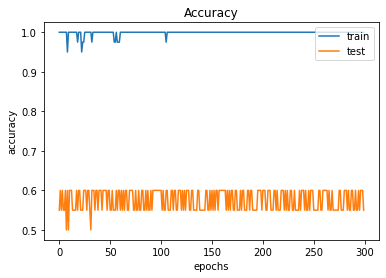

In [ ]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test)

1/1 [==============================] - 1s 1s/step - loss: 1.5300 - accuracy: 0.5500


In [ ]:
test_loss

1.5300430059432983

In [ ]:
test_accuracy

0.550000011920929